In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv', index_col = 0)

Cleaning and regularizing the data set
Firstly we will see the overall aspects of the data. Identify (and solve) possible issues. The target feature in this case is quite easy to indentify (SALE VALUE), but in many real case scenarios this might pose a challenge.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null 

In [4]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [5]:
categorical = df.select_dtypes(include=['object'])
categorical.head().transpose() # Transposing make visualization easier for big datasets

,4,5,6,7,8
NEIGHBORHOOD,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY
BUILDING CLASS CATEGORY,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS
TAX CLASS AT PRESENT,2A,2,2,2B,2A
EASE-MENT,,,,,
BUILDING CLASS AT PRESENT,C2,C7,C7,C4,C2
ADDRESS,153 AVENUE B,234 EAST 4TH STREET,197 EAST 3RD STREET,154 EAST 7TH STREET,301 EAST 10TH STREET
APARTMENT NUMBER,,,,,
LAND SQUARE FEET,1633,4616,2212,2272,2369
GROSS SQUARE FEET,6440,18690,7803,6794,4615
BUILDING CLASS AT TIME OF SALE,C2,C7,C7,C4,C2


Some things stand out already. 'EASE-MENT' and 'APARTMENT NUMBER' seem to have empty entries. 'SALE PRICE', our target feature, also has problems as some observations have a '-'.

A quick summary of the statistics of the dataset can be obtained as follows

In [6]:
categorical.describe().transpose()

,count,unique,top,freq
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235
TAX CLASS AT PRESENT,84548,11,1,38633
EASE-MENT,84548,1,,84548
BUILDING CLASS AT PRESENT,84548,167,D4,12663
ADDRESS,84548,67563,131-05 40TH ROAD,210
APARTMENT NUMBER,84548,3989,,65496
LAND SQUARE FEET,84548,6062,-,26252
GROSS SQUARE FEET,84548,5691,-,27612
BUILDING CLASS AT TIME OF SALE,84548,166,R4,12989


Some of these features should be numeric, so lets convert then. Some have '-' and blackspaces that we need to fix

In [8]:
df['SALE PRICE'] = df['SALE PRICE'].apply(lambda s: int(s) if not "-" in s else 0)
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].apply(lambda s: int(s) if not '-' in s else 0)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].apply(lambda s: int(s) if not '-' in s else 0)
df['SALE PRICE'] = df['SALE PRICE'].apply(lambda s: s if type(s) == int else 0)

The SALE DATE column should be converted to a propper datetime format.

In [9]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], format= '%Y-%m-%d %H:%M:%S')

The EASE-MENT column has no data in it so we will just drop it from the dataframe.

The APPARTMENT NUMBER column is 50% empty. One could use it to split the data in two groups, since the appartment number might hold a very important information: the building floor. For now we will drop it to avoid over complicating things.

The ADDRESS columns could be used for geographical data analysis, but doing such analysis is not in the scope of this project. It also seems retundant, as the ZIP code should hold the same information.

In [11]:
df.drop(["EASE-MENT", "ADDRESS", "APARTMENT NUMBER"], axis = 1, inplace = True)

Numerical data

In [12]:
numerical = df.select_dtypes(exclude=['object'])
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    84548 non-null  int64         
 1   BLOCK                      84548 non-null  int64         
 2   LOT                        84548 non-null  int64         
 3   ZIP CODE                   84548 non-null  int64         
 4   RESIDENTIAL UNITS          84548 non-null  int64         
 5   COMMERCIAL UNITS           84548 non-null  int64         
 6   TOTAL UNITS                84548 non-null  int64         
 7   LAND SQUARE FEET           84548 non-null  int64         
 8   GROSS SQUARE FEET          84548 non-null  int64         
 9   YEAR BUILT                 84548 non-null  int64         
 10  TAX CLASS AT TIME OF SALE  84548 non-null  int64         
 11  SALE PRICE                 84548 non-null  int64         
 12  SALE 

In [13]:
numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,84548.0,2.998758e+00,1.289790e+00,1.0,2.00,3.0,4.0,5.000000e+00
BLOCK,84548.0,4.237219e+03,3.568263e+03,1.0,1322.75,3311.0,6281.0,1.632200e+04
LOT,84548.0,3.762240e+02,6.581368e+02,1.0,22.00,50.0,1001.0,9.106000e+03
ZIP CODE,84548.0,1.073199e+04,1.290879e+03,0.0,10305.00,11209.0,11357.0,1.169400e+04
RESIDENTIAL UNITS,84548.0,2.025264e+00,1.672104e+01,0.0,0.00,1.0,2.0,1.844000e+03
COMMERCIAL UNITS,84548.0,1.935587e-01,8.713183e+00,0.0,0.00,0.0,0.0,2.261000e+03
TOTAL UNITS,84548.0,2.249184e+00,1.897258e+01,0.0,1.00,1.0,2.0,2.261000e+03
LAND SQUARE FEET,84548.0,2.717793e+03,3.490950e+04,0.0,0.00,1770.0,2658.0,4.252327e+06
GROSS SQUARE FEET,84548.0,2.724445e+03,2.881080e+04,0.0,0.00,1076.0,2080.0,3.750565e+06
YEAR BUILT,84548.0,1.789323e+03,5.373450e+02,0.0,1920.00,1940.0,1965.0,2.017000e+03


Some of this data just don't make any sense. 0 values are unaceptable values as ZIP CODE, TOTAL UNITS, GROSS SQUARE FEET and YEAR BUILT.

Our target feature SALE PRICE also have some 0 values. We will just eliminate these observations, but there are some other options. It's possible to use these as the test set (might not be a good idea as this subset can be different from the rest i.e. comparing sold to non sold properties). One could also try to make a classification analisys to decide if a new property will be sold or not.

Depending on the ammount of missing data we might want to delete the observations from the dataframe (as deleting few observation won't affect the statistics) or the entire feature (if most of the data is missing and deleting the observations it would cause severe information loss). Be aware that a feature can be VERY important, and sometimes its worth loosing half your data to keep it. I think that this is the case for the GROSS SQUARE feature, as this is a very important factor on the price of a property. This will drastically reduce the amount of availabe observations.

Yet another possibility is to use data imputation techniques (e.g. filling missing observations with the overall average), but I personaly don't like it as it feels wrong filling the target feature "by hand".

In [15]:
weird_zeros_cols = [
    "ZIP CODE",
    "GROSS SQUARE FEET",
    "YEAR BUILT",
    "SALE PRICE"
   ]

l = len(df)
for col in weird_zeros_cols:
    print(f"{col:.10}\t{len(df[df[col] == 0])/l:0.2f}% missing")

ZIP CODE	0.01% missing
GROSS SQUA	0.46% missing
YEAR BUILT	0.08% missing
SALE PRICE	0.29% missing


In [16]:
for col in weird_zeros_cols:
    df = df[df[col] != 0]

Exploratory Data Analysis
There are simply too many things to explore in each data set. I like to see wich categories hold most observations, plot the relationship of the features to the target and look for outliers.

In [17]:
categorical = df.select_dtypes(include=['object'])
categorical.describe().transpose()

,count,unique,top,freq
NEIGHBORHOOD,29312,249,FLUSHING-NORTH,796
BUILDING CLASS CATEGORY,29312,30,01 ONE FAMILY DWELLINGS,12929
TAX CLASS AT PRESENT,29312,6,1,25452
BUILDING CLASS AT PRESENT,29312,124,A1,4837
BUILDING CLASS AT TIME OF SALE,29312,128,A1,4833


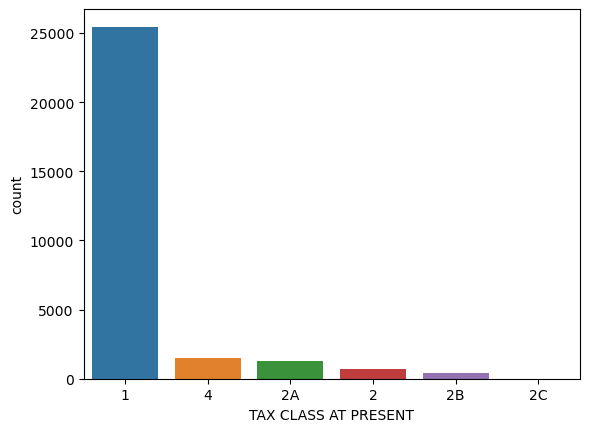

In [18]:
sns.countplot(
    x="TAX CLASS AT PRESENT",
    data = df,
    order = df["TAX CLASS AT PRESENT"].value_counts().index,
)
plt.show()

<AxesSubplot:title={'center':'Total Sale Price per Tax Class'}, xlabel='TAX CLASS AT PRESENT'>

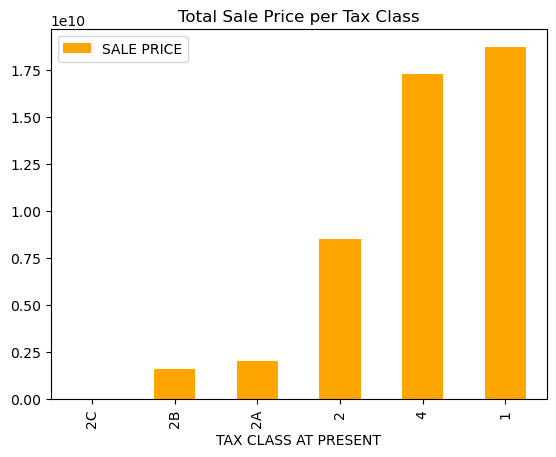

In [19]:
pivot = df.pivot_table(index='TAX CLASS AT PRESENT',
                       values='SALE PRICE',
                       aggfunc=np.sum,).sort_values("SALE PRICE")

pivot.plot(
    kind='bar',
    color='orange',
    title="Total Sale Price per Tax Class"
)

<AxesSubplot:title={'center':'Total Sale Price per Tax Class'}, xlabel='TAX CLASS AT PRESENT'>

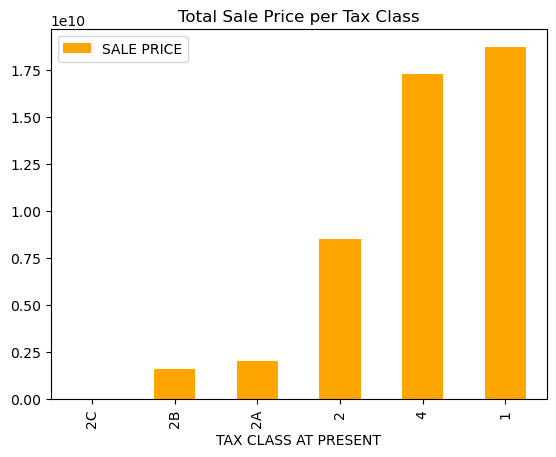

In [20]:
pivot = df.pivot_table(index='TAX CLASS AT PRESENT',
                       values='SALE PRICE',
                       aggfunc=np.sum,).sort_values("SALE PRICE")

pivot.plot(
    kind='bar',
    color='orange',
    title="Total Sale Price per Tax Class"
)

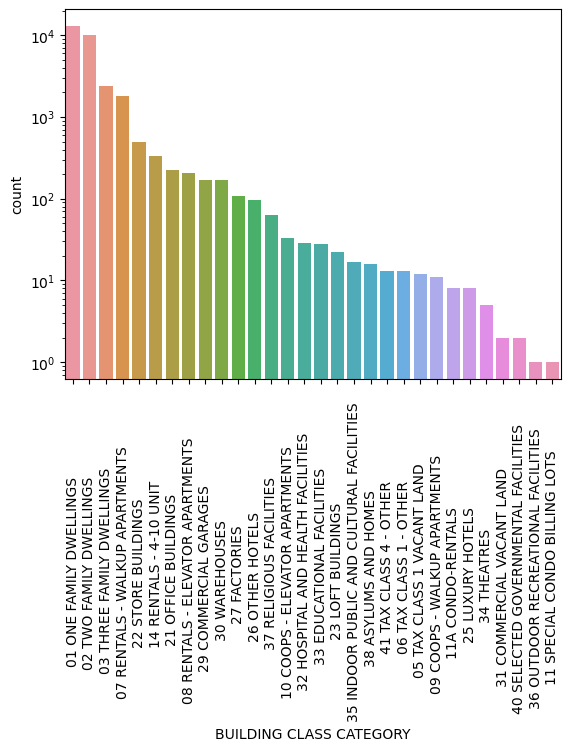

In [21]:
g = sns.countplot(
    x='BUILDING CLASS CATEGORY',
    data = df,
    order = df["BUILDING CLASS CATEGORY"].value_counts().index,
)
g.set_yscale('log')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.show()

<AxesSubplot:xlabel='BUILDING CLASS CATEGORY'>

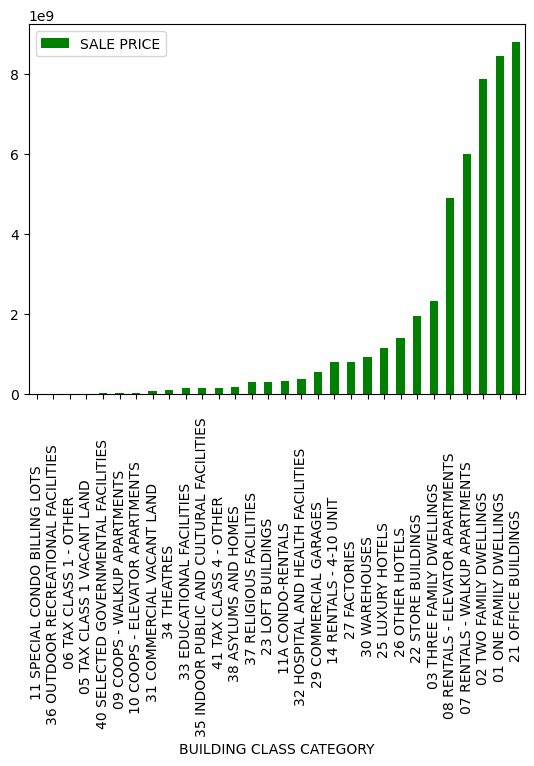

In [22]:
pivot = df.pivot_table(index='BUILDING CLASS CATEGORY',
                       values='SALE PRICE',
                       aggfunc=np.sum).sort_values("SALE PRICE")
pivot.plot(kind='bar', color = 'green')

In [23]:
df['BUILDING CLASS CATEGORY'].value_counts().head(6)

01 ONE FAMILY DWELLINGS                        12929
02 TWO FAMILY DWELLINGS                        10093
03 THREE FAMILY DWELLINGS                       2403
07 RENTALS - WALKUP APARTMENTS                  1801
22 STORE BUILDINGS                               489
14 RENTALS - 4-10 UNIT                           335
Name: BUILDING CLASS CATEGORY, dtype: int64

In [24]:
top_vals = df['BUILDING CLASS CATEGORY'].value_counts().index[:5]
df = df[df["BUILDING CLASS CATEGORY"].isin(top_vals)]

add Codeadd Markdown
To reduce the complexity of our model, lets grab only the most representative BUIDING CLASS CATEGORY

In [25]:
top_vals = df['BUILDING CLASS CATEGORY'].value_counts().index[:5]
df = df[df["BUILDING CLASS CATEGORY"].isin(top_vals)]

In [26]:
numerical = df.select_dtypes(exclude=['object', 'datetime'])
numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,27715.0,3.581238,9.887847e-01,1.0,3.0,4.0,4.0,5.0
BLOCK,27715.0,5681.880642,3.780219e+03,8.0,2864.0,5024.0,7941.5,16319.0
LOT,27715.0,61.956305,1.168993e+02,1.0,20.0,39.0,65.0,3710.0
ZIP CODE,27715.0,11008.269240,4.698751e+02,10001.0,10465.0,11221.0,11375.0,11694.0
RESIDENTIAL UNITS,27715.0,2.190655,6.026099e+00,0.0,1.0,2.0,2.0,716.0
COMMERCIAL UNITS,27715.0,0.093848,1.206578e+00,0.0,0.0,0.0,0.0,126.0
TOTAL UNITS,27715.0,2.284034,6.273833e+00,0.0,1.0,2.0,2.0,736.0
LAND SQUARE FEET,27715.0,3473.750857,2.123560e+04,200.0,2000.0,2500.0,3800.0,1865243.0
GROSS SQUARE FEET,27715.0,2531.068411,8.141300e+03,240.0,1344.0,1816.0,2508.0,683200.0
YEAR BUILT,27715.0,1940.533033,3.040853e+01,1800.0,1920.0,1930.0,1960.0,2017.0


<AxesSubplot:>

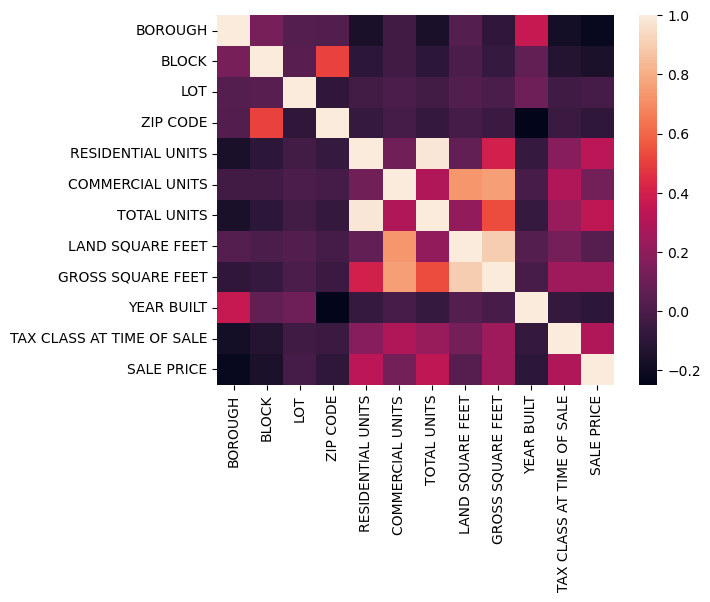

In [27]:
sns.heatmap(numerical.corr()) #, annot= True)

We see a huge correlation between LAND SQUARE FEET and GROSS SQUARE FEET and between RESIDENTIAL UNITS and TOTAL UNITS. Correlated features in general don't improve models so we will keep only one of these features.

In [28]:
df.drop(["RESIDENTIAL UNITS", "LAND SQUARE FEET"], axis = 1, inplace = True)

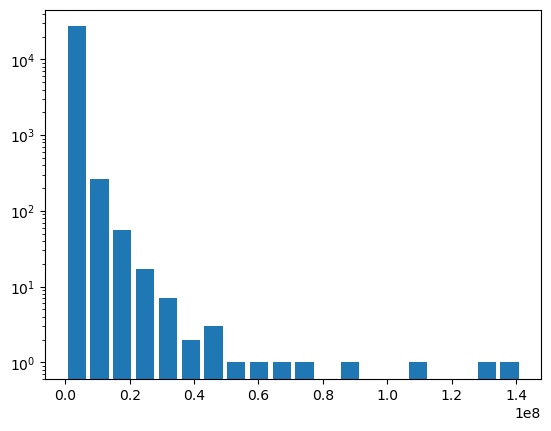

In [29]:
plt.hist(
    df["SALE PRICE"],
    bins = 20,
    log = True,
    rwidth = 0.8
)
plt.show()

In [30]:
df = df[(df['SALE PRICE'] < 5e8) & (df['SALE PRICE'] > 1e5)]

If you want to make a pretier plot (for a executive report for example), it would be interesting to add colors to the histogram. It is good to remember that this is just "perfumery", as adding colors won't add any new information to the plot and might just confuse the reader in most casses (as people will try to undertand the meaning of the colors, wich they don't have)

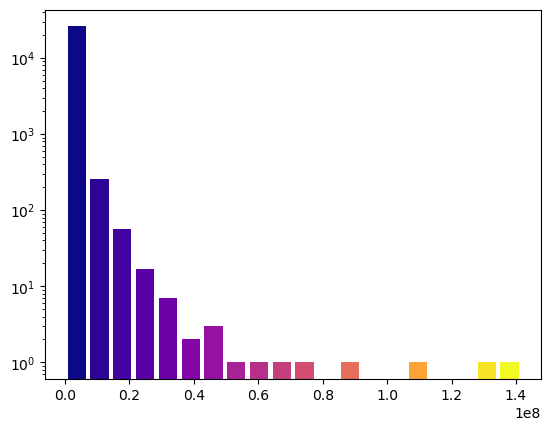

In [31]:
# Plot histogram.
n, bins, patches = plt.hist(
    df["SALE PRICE"],
    bins = 20,
    log = True,
    rwidth = 0.8
) 
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

cm = plt.cm.get_cmap('plasma')
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))


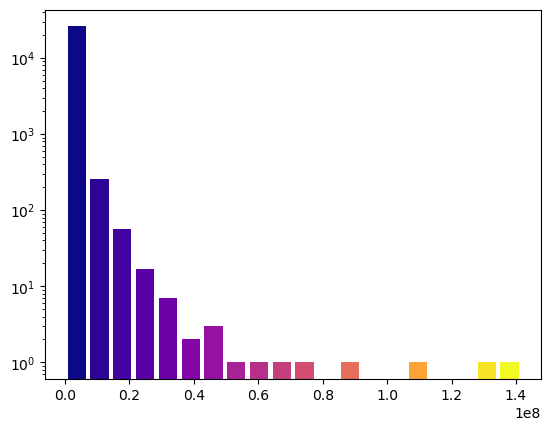

In [33]:
n, bins, patches = plt.hist(
    df["SALE PRICE"],
    bins = 20,
    log = True,
    rwidth = 0.8
) 
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

cm = plt.cm.get_cmap('plasma')
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))


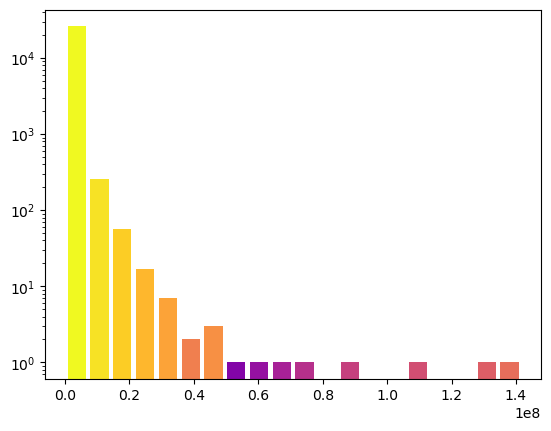

In [34]:
n, bins, patches = plt.hist(
    df["SALE PRICE"],
    bins = 20,
    log = True,
    rwidth = 0.8
) 

bin_centers = 0.5 * (bins[:-1] + bins[1:])

sorted_patches = [p for _,p in sorted(zip(n,patches), key=lambda pair: pair[0])] #sorts patches in respect to n
sorted_centers = [c for _,c in sorted(zip(n, bin_centers), key=lambda pair: pair[0])] #sorts bin_centers in respect to n

# scale values to interval [0,1]
col = sorted_centers - min(sorted_centers)
col /= max(col)
col = sorted(col)
cm = plt.cm.get_cmap('plasma')
for c, p in zip(col, sorted_patches):
    plt.setp(p, 'facecolor', cm(c))

plt.show()

This features is very skewed, in numbers:

In [35]:
df["SALE PRICE"].skew()

25.897392087118156

In [36]:
price = np.log(df["SALE PRICE"])
print(price.skew())

1.219909669472722


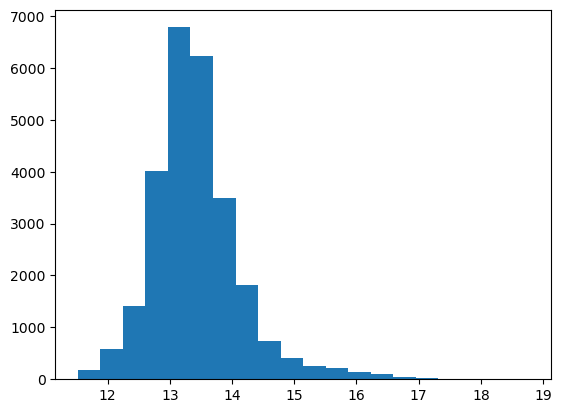

In [37]:
plt.hist(price, bins =20)
plt.show()

<AxesSubplot:xlabel='BOROUGH'>

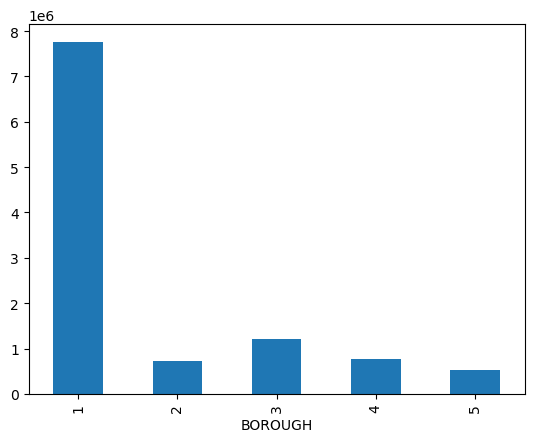

In [38]:
df.groupby("BOROUGH").mean()['SALE PRICE'].plot(kind='bar') # An alternative to pivot tables

In [39]:
df['TOTAL UNITS'].value_counts()

1      12380
2       9494
3       2734
4        608
6        324
       ...  
74         1
736        1
192        1
51         1
71         1
Name: TOTAL UNITS, Length: 75, dtype: int64

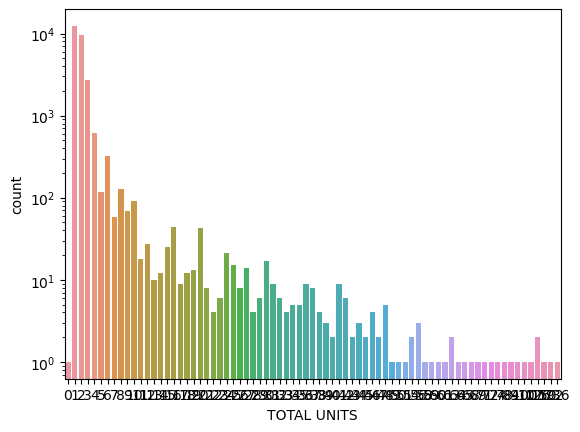

In [40]:
sns.countplot(x='TOTAL UNITS', data = df, log=True)
plt.show()

In [41]:
df = df[df['TOTAL UNITS'] < 50]

In [42]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    24266
2     1679
4      462
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [43]:
df['BOROUGH'].value_counts()

4    10276
3     7626
5     4776
2     3129
1      600
Name: BOROUGH, dtype: int64

Temporal data
The only temporal feature is SALE DATE. Lets check structure of the time series

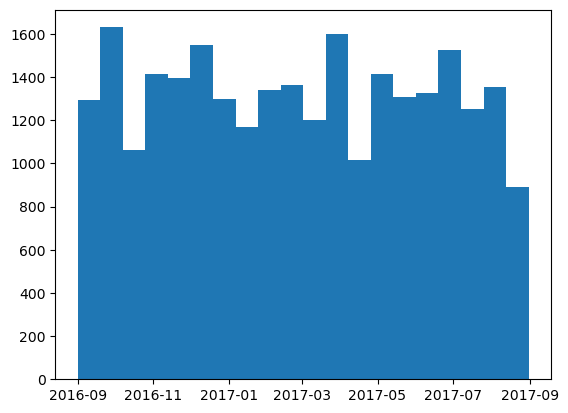

In [44]:
plt.hist(df['SALE DATE'], bins=20)
plt.show()

C:\Users\BASHEER\anaconda3\New folder\ana\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE DATE', ylabel='count'>

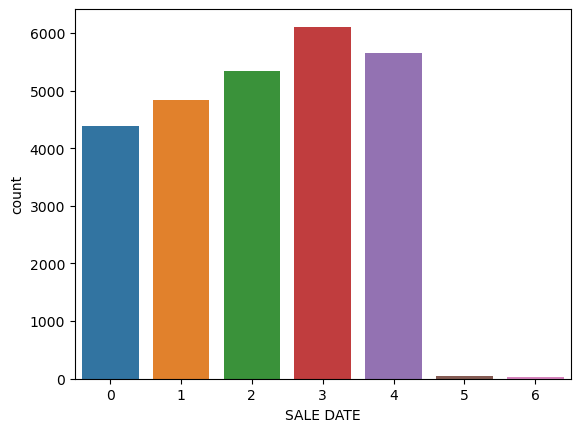

In [45]:
sns.countplot(df["SALE DATE"].dt.dayofweek)

In [46]:
df['day'] = df["SALE DATE"].dt.dayofweek
df = df[df["day"] < 5 ]
df.drop(["day"], axis =1, inplace = True)

C:\Users\BASHEER\anaconda3\New folder\ana\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE DATE', ylabel='count'>

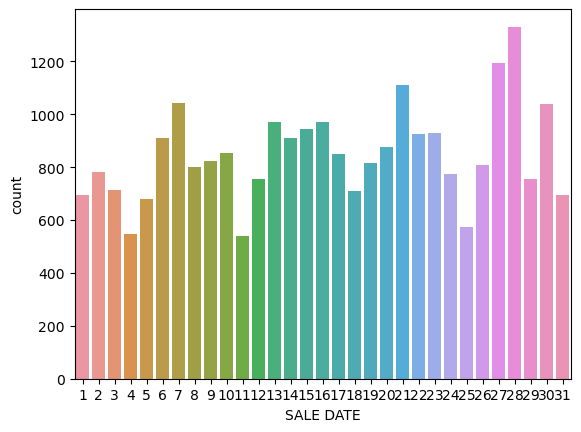

In [47]:
sns.countplot(df["SALE DATE"].dt.day)

<AxesSubplot:>

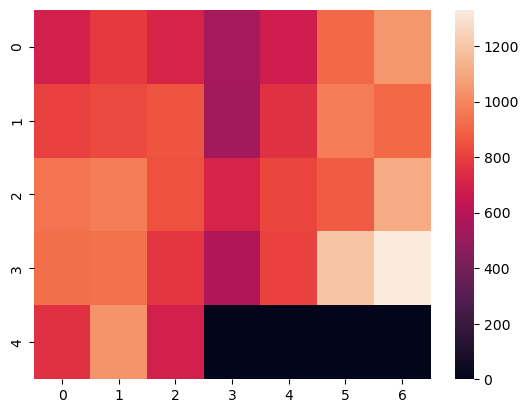

In [48]:
month = np.empty(5 * 7)
for day, count in df["SALE DATE"].dt.day.value_counts().iteritems():
    month[int(day) -1] = count
month = month.reshape((5,7))
sns.heatmap(month)

I want to make a fancy data visualization out of this (just for the sake of doing it).

Seaborn has a nice FacedGrid method that allows for ridge plots, but I find it quite non intuitive, and prefer to use the joyplot library because I find it more intuitive and has a syntax similar to matplotlib. A nice challege would be to implement this with pure matplotlib functions.


ModuleNotFoundError: No module named 'joypy'

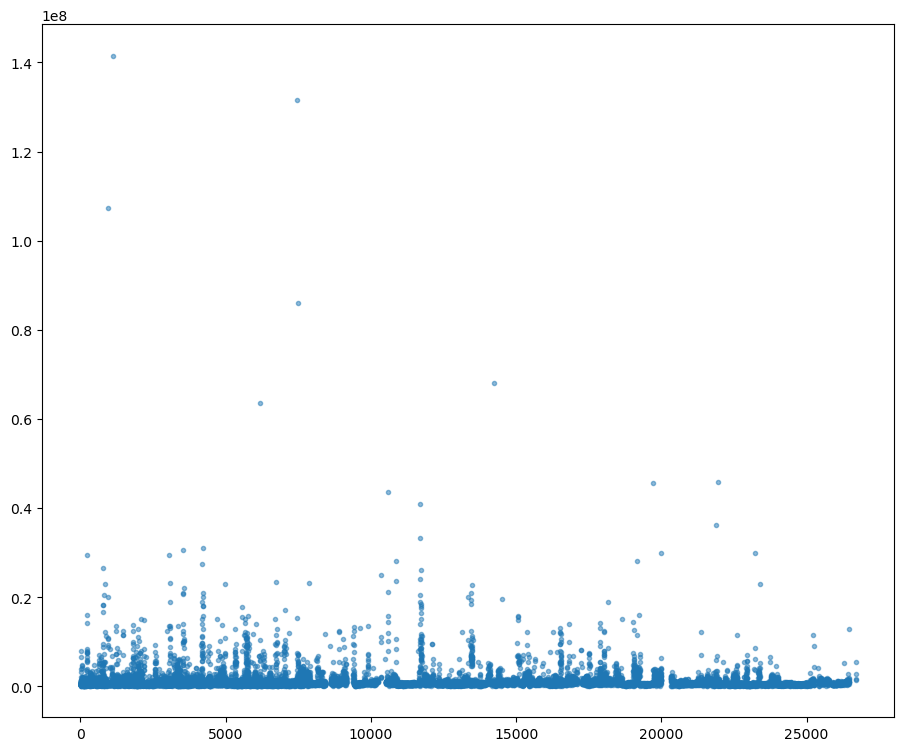

In [50]:
axes = df["SALE PRICE"].plot(
    marker='.',
    alpha=0.5,
    linestyle='',
    figsize=(11, 9),
    subplots=True
)

Data Preparation
Preperaing the data for regression

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26321 entries, 4 to 8412
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         26321 non-null  int64         
 1   NEIGHBORHOOD                    26321 non-null  object        
 2   BUILDING CLASS CATEGORY         26321 non-null  object        
 3   TAX CLASS AT PRESENT            26321 non-null  object        
 4   BLOCK                           26321 non-null  int64         
 5   LOT                             26321 non-null  int64         
 6   BUILDING CLASS AT PRESENT       26321 non-null  object        
 7   ZIP CODE                        26321 non-null  int64         
 8   COMMERCIAL UNITS                26321 non-null  int64         
 9   TOTAL UNITS                     26321 non-null  int64         
 10  GROSS SQUARE FEET               26321 non-null  int64         
 11  YEA

To reduce he dimensionality, we're going to delete some features that feel redundant.

BUIDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE feel redundant with CUILDING CLASS CATEGORY, so we will keep only the latter.

All "geological" information should be in the ZIP CODE, so we will drop all other related features.

We will chosse only one of TAX CLASS AT PRESENT and TAX CLASS AT TIME OF SALE

In [52]:
df.drop([
    "BUILDING CLASS AT PRESENT",
    "BUILDING CLASS AT TIME OF SALE",
    "NEIGHBORHOOD",
    'TAX CLASS AT PRESENT'
], axis = 1, inplace = True)

In [53]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    24183
2     1676
4      462
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [54]:
df["SALE DATE"] = pd.to_numeric(df["SALE DATE"])

Its always in good practice to remove skwness from the numerical data and scale it (its not mandatory, but since some of our models will be simetric, removing the skewness from all features should help quite a lot)




Now we encode all categorical features. This can be done in two ways (mainly): One-hot encoding and integer encoding. One-hot is best used when there are only a few unique values of a given feature, as it creates a new column per unique value (i.e. True or False for each value). If we have too many unique values (and a big data set) integer encoding becomes a possibility.

In [56]:
one_hot = ['BUILDING CLASS CATEGORY','TAX CLASS AT TIME OF SALE']
dummies = pd.get_dummies(df[one_hot])
dummies = pd.concat([dummies, pd.get_dummies(df["BOROUGH"])], axis=1) #BOROUGH are integers, so we need to do it seperately
dummies.info(verbose=True, memory_usage=True) #Its nice to check how much memory the dummies will require

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26321 entries, 4 to 8412
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   TAX CLASS AT TIME OF SALE                                            26321 non-null  int64
 1   BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                      26321 non-null  uint8
 2   BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                      26321 non-null  uint8
 3   BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                    26321 non-null  uint8
 4   BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS               26321 non-null  uint8
 5   BUILDING CLASS CATEGORY_22 STORE BUILDINGS                           26321 non-null  uint8
 6   1                                                                    26321 non-null  uint8
 7   2                      

In [74]:
from sklearn.model_selection import train_test_split

features = df.drop(["SALE PRICE"], axis = 1)
target = df["SALE PRICE"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [83]:
"""df=df.drop(["BUILDING CLASS CATEGORY"],axis=True)"""

'df=df.drop(["BUILDING CLASS CATEGORY"],axis=True)'

In [76]:
df.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,392,6,10009,0,5,6440,1900,2,6625000,1500422400000000000
7,1,402,21,10009,0,10,6794,1913,2,3936272,1474588800000000000
8,1,404,55,10009,0,6,4615,1900,2,8000000,1479340800000000000
10,1,406,32,10009,0,8,4226,1920,2,3192840,1474588800000000000
199,1,390,34,10009,1,1,3586,1899,4,3700000,1475020800000000000


In [77]:
# Outlier detection
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 1000)
clf.fit(x_train)

outliers = clf.predict(x_train)
np.unique(outliers, return_counts = True)

(array([-1,  1]), array([ 1550, 16874], dtype=int64))

In [78]:
df.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,392,6,10009,0,5,6440,1900,2,6625000,1500422400000000000
7,1,402,21,10009,0,10,6794,1913,2,3936272,1474588800000000000
8,1,404,55,10009,0,6,4615,1900,2,8000000,1479340800000000000
10,1,406,32,10009,0,8,4226,1920,2,3192840,1474588800000000000
199,1,390,34,10009,1,1,3586,1899,4,3700000,1475020800000000000


In [80]:
# Outlier detection
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 1000)
clf.fit(x_train)

outliers = clf.predict(x_train)
np.unique(outliers, return_counts = True)

(array([-1,  1]), array([ 1449, 16975], dtype=int64))

Linear Regression 

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, y_pred) ** 0.5)

0.20836595636639166
2162156.745530819


C:\Users\BASHEER\anaconda3\New folder\ana\New folder\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
